In [24]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

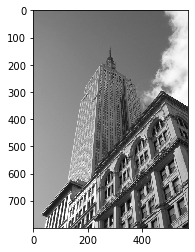

In [2]:
img = cv.imread('empire.jpg') #load image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
avg_kernel = np.ones((5,5), np.float32) / 25 #kernel K defined above
avg_result = cv.filter2D(img_gray, -1, avg_kernel) #always set the second parameter to -1
plt.imshow(img_gray, 'gray')

True

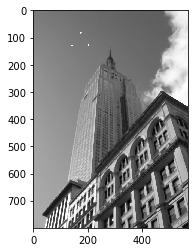

In [47]:
#Testing median filter
img_noise = cv.imread('empire_shotnoise.jpg')
img_noise_gray = cv.cvtColor(img_noise, cv.COLOR_BGR2GRAY)
ksize = 5 # neighbourhood of ksize x ksize; ksize must be an odd number
med_result = cv.medianBlur(img_noise_gray, ksize)
plt.imshow(med_result, 'gray')
cv.imwrite('medianfilter.png',med_result)

True

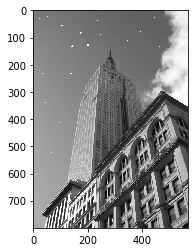

In [48]:
#Testing bilateral filter
rad = 5 #radius to determine neighbourhood
sigma_s = 10 #standard deviation for spatial distance (see slide 21 in week 2 lecture slides)
sigma_c = 30 #standard deviation for colour difference (see slide 21 in week 2 lecture slides)
bil_result = cv.bilateralFilter(img_noise_gray, rad, sigma_c, sigma_s)
plt.imshow(bil_result, 'gray')
cv.imwrite('bilateralfilter.png',bil_result)

True

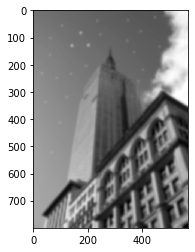

In [49]:
#Testing gaussian filter
gau_result = cv.GaussianBlur(img_noise_gray,(0,0),cv.BORDER_DEFAULT)
plt.imshow(gau_result, 'gray')
cv.imwrite('gaussianfilter.png',gau_result)

True

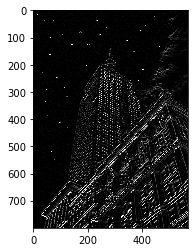

In [50]:
#Testing sobel filter
sob_result = cv.Sobel(img_noise_gray,cv.CV_8U,0,1,ksize=3)
plt.imshow(sob_result, 'gray')
cv.imwrite('sobelfilter.png',sob_result)

###  Edge detection

True

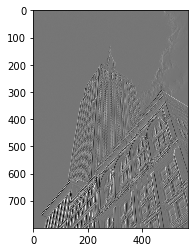

In [52]:
D_x = np.float32([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8
der_x = cv.filter2D(img_gray, cv.CV_32F, D_x) 
plt.imshow(der_x, 'gray')
cv.imwrite('xder.png',der_x)

True

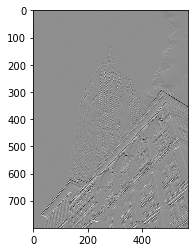

In [53]:
D_y = np.float32([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) / 8
der_y = cv.filter2D(img_gray, cv.CV_32F, D_y) 
plt.imshow(der_y, 'gray')
cv.imwrite('yder.png',der_y)

True

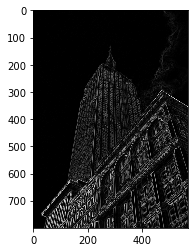

In [54]:
import math
height, width = img_gray.shape
mag_img_gray = np.zeros((height, width), np.float32) #gradient magnitude of img_gray 
for i in range(0, height):
    for j in range(0, width):
        square_der_x = float(der_x[i, j]) * float(der_x[i, j])
        square_der_y = float(der_y[i, j]) * float(der_y[i, j])
        mag_img_gray[i, j] = int(math.sqrt(square_der_x + square_der_y)) 
plt.imshow(mag_img_gray,'gray')
cv.imwrite('magnitude.png',mag_img_gray)

True

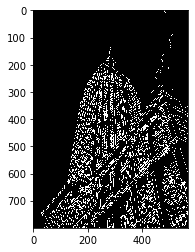

In [55]:
minVal = 100 #minVal used in hysteresis thresholding
maxVal = 200 #maxVal used in hysteresis thresholding
Canny_edges = cv.Canny(img_gray, minVal, maxVal)
plt.imshow(Canny_edges, 'gray')
cv.imwrite('canny.png',Canny_edges)